**Load and prepare model for data**

In [1]:
from tensorflow import keras

2025-10-29 10:58:44.731745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761735525.156692      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761735525.272476      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
base = keras.applications.VGG16(
    weights = "imagenet", # Use imagenet weights to match
    input_shape = (224, 224, 3), # Specify input shape to match dataset (224 x 224 pixels, 3 color channels)
    include_top = False # Remove output layer
)

I0000 00:00:1761735546.792044      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761735546.792933      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Verify removal of output layer
base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Freeze base layers to retain learning
base.trainable = False

In [5]:
# Specify inputs with correct shape
inputs = keras.Input(shape = (224, 224, 3))
x = base(inputs, training = False)

# Add pooling layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add dense output layer
outputs = keras.layers.Dense(6, activation = "softmax")(x)

# Combine to create new model
model = keras.Model(inputs, outputs)

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,717,766 (56.14 MB)

 Trainable params: 3,078 (12.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
# Compile the model
model.compile(
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

**Data Preparation**

In [8]:
# Augment data to increase model accuracy when trained
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generator for training dataset
datagen_train = ImageDataGenerator(
    samplewise_center = True, # Set sample mean to 0
    rotation_range = 10, # Randomly rotate images 10 degrees
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range = 0.1, # Randomly shift image horizontally
    height_shift_range = 0.1, # Randomly shift image vertically
    horizontal_flip = True, # Allow horizontal flipping
    vertical_flip = False # Don't allow vertical flipping
)

# No augmenting needed for testing data
datagen_test = ImageDataGenerator(
    samplewise_center = True # Set sample mean to 0
)

In [9]:
# Load training dataset
data_train = datagen_train.flow_from_directory(
    "/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train", # Dataset path
    target_size = (224, 224), # Image size (224 x 224 pixels)
    color_mode = "rgb", # Color mode (rgb == 3 channel)
    class_mode = "categorical"
)

Found 10901 images belonging to 6 classes.


In [10]:
# Load testing dataset
data_test = datagen_test.flow_from_directory(
    "/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test", # Dataset path
    target_size = (224, 224), # Image size (224 x 224 pixels)
    color_mode = "rgb", # Color mode (rgb == 3 channel)
    class_mode = "categorical"
)

Found 2698 images belonging to 6 classes.


**Model Training & Fine Tuning**

In [11]:
# Train & evaluate the model with training and testing datasets
model.fit(
    data_train,
    validation_data=data_test,
    steps_per_epoch=int(data_train.samples / data_train.batch_size),
    validation_steps=int(data_test.samples / data_test.batch_size),
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1761735604.515297      97 service.cc:148] XLA service 0x7eb868005730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761735604.517012      97 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761735604.517034      97 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761735604.922756      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/340 ━━━━━━━━━━━━━━━━━━━━ 1:30:32 16s/step - accuracy: 0.2188 - loss: 5.3962

I0000 00:00:1761735618.265719      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


340/340 ━━━━━━━━━━━━━━━━━━━━ 318s 891ms/step - accuracy: 0.6642 - loss: 1.5031 - val_accuracy: 0.9442 - val_loss: 0.1782
Epoch 2/10
  1/340 ━━━━━━━━━━━━━━━━━━━━ 1:09 206ms/step - accuracy: 0.9375 - loss: 0.2703

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.9375 - loss: 0.2703 - val_accuracy: 0.9315 - val_loss: 0.2123
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 188s 551ms/step - accuracy: 0.9450 - loss: 0.1579 - val_accuracy: 0.9576 - val_loss: 0.1434
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9062 - loss: 0.1819 - val_accuracy: 0.9650 - val_loss: 0.1153
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 182s 535ms/step - accuracy: 0.9664 - loss: 0.0948 - val_accuracy: 0.9717 - val_loss: 0.0891
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.9688 - loss: 0.1166 - val_accuracy: 0.9639 - val_loss: 0.1083
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 179s 526ms/step - accuracy: 0.9725 - loss: 0.0722 - val_accuracy: 0.9747 - val_loss: 0.0836
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 1.0000 - loss: 0.0277 - val_accuracy: 0.9799 - val_loss: 0.0722
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 177s 520ms/step - accuracy: 0.9824 - loss: 0.0532 - val

In [12]:
# Unfreeze base to fine-tune model
base.trainable = True

# Recompile model with low learning rate and unfrozen layers
model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate = .00001), # Very low learning rate
    loss = "categorical_crossentropy", # Same as prior compile
    metrics = ["accuracy"] # Same as prior compile
)

In [13]:
# Train & evaluate the model with training and testing datasets
model.fit(
    data_train,
    validation_data=data_test,
    steps_per_epoch=int(data_train.samples / data_train.batch_size),
    validation_steps=int(data_test.samples / data_test.batch_size),
    epochs=10
)

Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 300s 736ms/step - accuracy: 0.9780 - loss: 0.0848 - val_accuracy: 0.9948 - val_loss: 0.0123
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9944 - val_loss: 0.0117
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 217s 636ms/step - accuracy: 0.9925 - loss: 0.0229 - val_accuracy: 0.9989 - val_loss: 0.0071
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9967 - val_loss: 0.0075
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 218s 639ms/step - accuracy: 0.9971 - loss: 0.0079 - val_accuracy: 0.9981 - val_loss: 0.0032
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 1.0000 - loss: 6.7055e-07 - val_accuracy: 0.9981 - val_loss: 0.0032
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 217s 637ms/step - accuracy: 0.9985 - loss: 0.0060 - val_accuracy: 0.9996 - val_loss: 0.0013
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 1.0000 - los

In [14]:
# Save trained model
model.save("fruit_cnn.h5")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [15]:
# Create a download link for the model
from IPython.display import FileLink
FileLink(r'fruit_cnn.h5')

/kaggle/working/fruit_cnn.h5

**Evaluation**

In [16]:
# Load model (allows for testing without retraining)
from tensorflow import keras

reconstructed_model = keras.models.load_model("fruit_cnn.h5")

In [17]:
# Imports for evaluation and prediction functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Create a string of characters that correspond to predictions
options = "ABOabo"

# Create a function that shows the chosen image and produces a readable string of the models prediction
def predict_fruit(image_path):
    image = mpimg.imread(image_path) # Read in image from path
    plt.imshow(image) # Display image
    image = image_utils.load_img(image_path, target_size=(224, 224)) # Load image with target size
    image = image_utils.img_to_array(image) # Convert image to numpy array
    image = image.reshape(1, 224, 224, 3) # Reshape to enure correct details for model
    image = preprocess_input(image) # Preprocess inputs for prediction
    pred = reconstructed_model.predict(image) # Predict the image using model
    prediction = options[np.argmax(pred)] # Return indices to help produce readable predictions

    # Use elif statement to produce more readable predictions for user
    if prediction == "A":
        prediction = "A Fresh Apple"
    elif prediction == "B":
        prediction = "A Fresh Banana"
    elif prediction == "O":
        prediction = "A Fresh Orange"
    elif prediction == "a":
        prediction = "A Rotten Apple"
    elif prediction == "b":
        prediction = "A Rotten Banana"
    else:
        prediction = "A Rotten Orange"

    return prediction # Return prediction

In [18]:
# Evaluate the model
reconstructed_model.evaluate(data_test, steps=int(data_test.samples / data_test.batch_size))

84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.9995 - loss: 0.0018


[0.002160745905712247, 0.9992559552192688]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'A Fresh Apple'

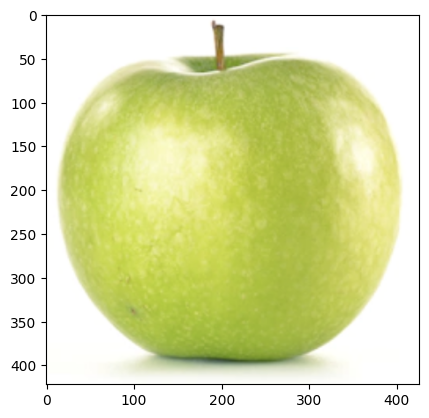

In [19]:
# Predict fruits with the predict_fruit function
predict_fruit("/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.03.40 PM.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'A Fresh Orange'

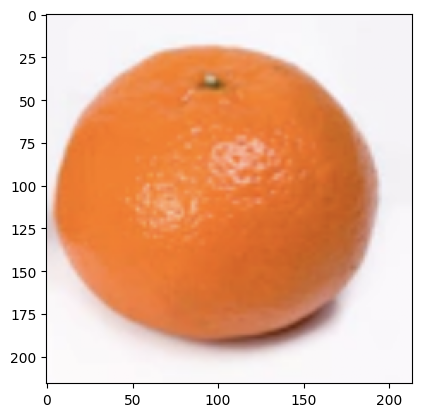

In [20]:
# Predict fruits with the predict_fruit function
predict_fruit("/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/freshoranges/Screen Shot 2018-06-12 at 11.55.28 PM.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'A Rotten Banana'

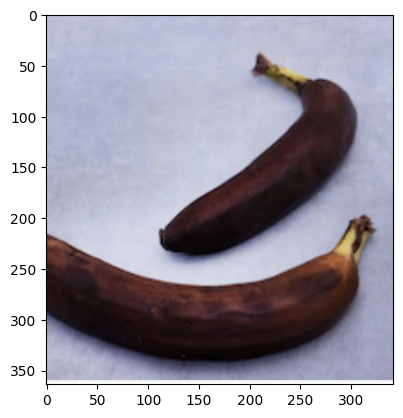

In [24]:
# Predict fruits with the predict_fruit function
predict_fruit("/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 8.53.09 PM.png")